## Tarea: Replicar el MaxSelector
Dalia Camacho

In [1]:
# Importar librerías numpy y matplotlib.pyplot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

### 1) Agregar método de Euler

In [2]:
# Definir las funciones para generar gráficas

def plot_est_mem_out(n, vals, matvals, vals3):
    fig = plt.figure()
    m   = np.shape(matvals)[1]
    for i in range(0,n):
        axi = fig.add_axes([0.0, 0.4*(n-i), 0.8, 0.4],
                   xticklabels=[], ylim=(0.0, 1.0), yticklabels=[])
        
        axj = fig.add_axes([0.9, 0.4*(n-i), 0.8, 0.4],
                   xticklabels=[], ylim=(-2.0, 2.0))
        
        axk = fig.add_axes([1.8, 0.4*(n-i), 0.8, 0.4],
                   xticklabels=[], ylim=(0.0, 1.0), yticklabels=[])
        
        axi.add_patch(
        patches.Rectangle((0.5-vals[i]/2, 0.5-vals[i]/2), vals[i], vals[i]))
        
        axj.plot(matvals[i,])
        axj.plot(np.zeros(m))
        
        axk.add_patch(
        patches.Rectangle((0,0), vals3[i], vals3[i]))

In [3]:
#Definir funciones necesarias para el MaxSelector

# Se define una función escalón. 
# Elige entre dos valores, la elección depende de un threshhold
def step(pot, thr, val_less, val_gr_eq):
    return np.where(pot<thr,val_less,val_gr_eq)

# Se define una función que elige al valor de input si este es mayor o igual a cero. 
# Elige cero en otro caso
def ramp(pot, thr):
    return np.where(pot<thr, 0, pot)

# Se define una función que dadas ini, tau, f y delta realiza un paso del método de Euler
# Tau es una constante del sistema
def diff(ini,delta, tau, f):
    return ini+delta*f/tau

# Se define la función MaxSelector, la cual elige el máximo de un arreglo
def MaxSelector(time, delta, stimulus, tau_u, w1_u, w2_u, h1_u, k_u, tau_v, h2_v):
    size  = np.size(stimulus)
    up    = np.zeros((size,1))
    uf    = np.zeros((size,1))
    matup = np.zeros((size,round(1/delta*time)))
    vp    = 0.0
    vf    = 0.0
    count = 0
    for t in np.arange(0.0, time, delta):
        up = diff(up, delta, tau_u, -up +w1_u*uf -w2_u*vf -h1_u +stimulus)
        uf = step(up, k_u, 0.0, 1.0)
    
        vp = diff(vp, delta, tau_v, -vp + np.sum(uf) -h2_v)
        vf = ramp(vp, 0.0)
        
        matup[:,count] = up.T
        count = count+1
    plot_est_mem_out(size, stimulus, matup ,uf)
    return(uf.T)

### 2) Verificar que ante dos estímulos distintos escoja el mayor

In [4]:
# Definir parámetros del sistema a excepción del estímulo
time  = 10
delta = 0.05

tau_u = 1.0
w1_u  = 1.0
w2_u  = 1.0
h1_u  = 0.2
k_u   = 0.3

tau_v = 1.0
h2_v  = 0.5

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

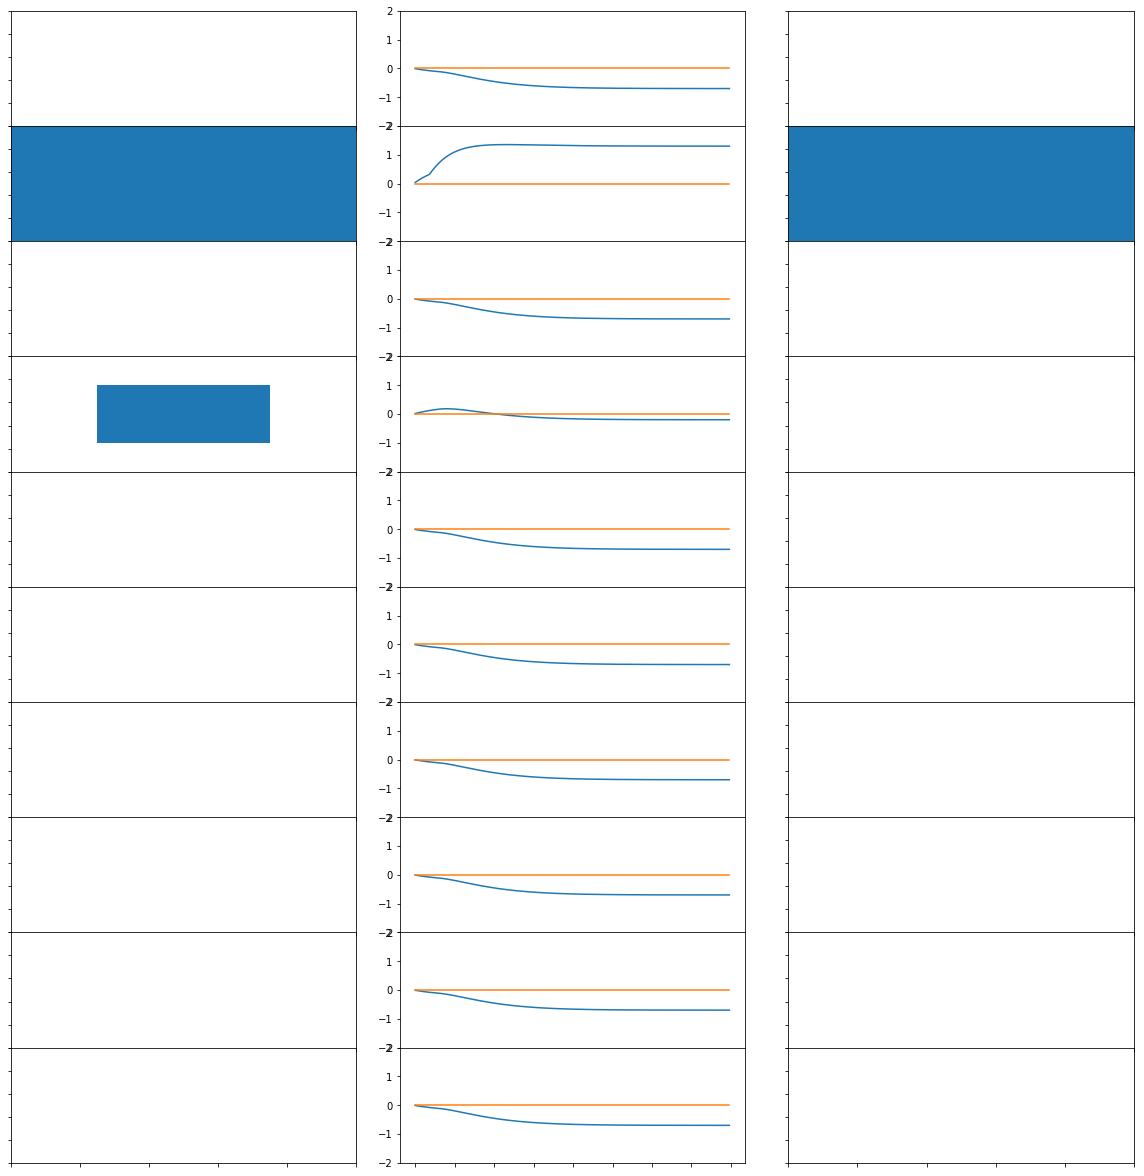

In [5]:
# La segunda entrada tiene el valor máximo
stimulus = np.array([[0.0, 1.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]).T
MaxSelector(time, delta, stimulus, tau_u, w1_u, w2_u, h1_u, k_u, tau_v, h2_v )

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

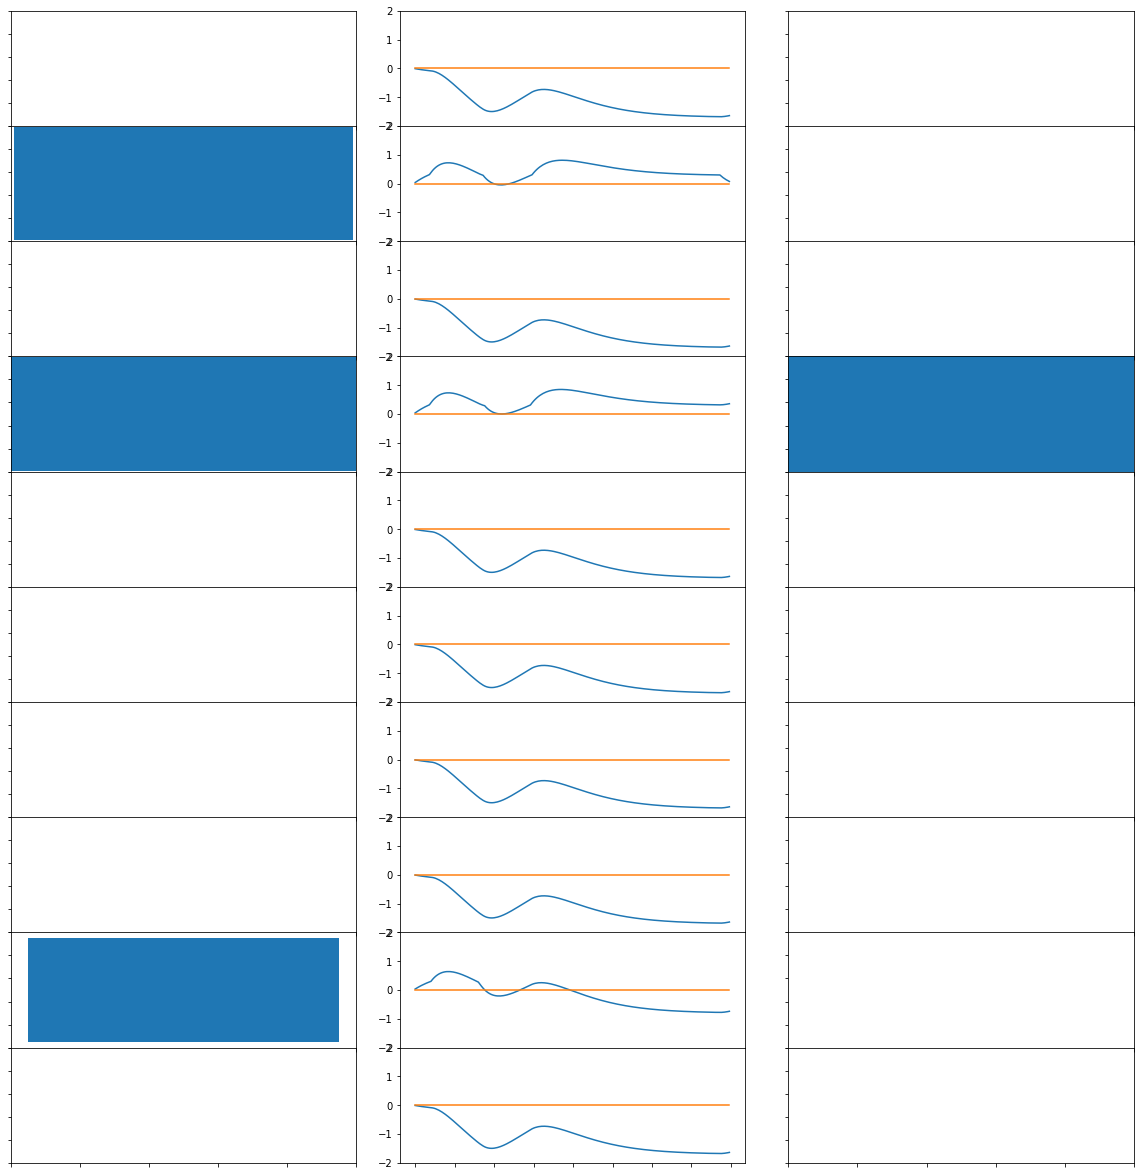

In [6]:
# La cuarta entrada tiene el valor máximo
stimulus = np.array([[0.0, 0.98, 0.0, 0.998, 0.0, 0.0, 0.0, 0.0, 0.9, 0.0]]).T

MaxSelector(time, delta, stimulus, tau_u, w1_u, w2_u, h1_u, k_u, tau_v, h2_v )

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

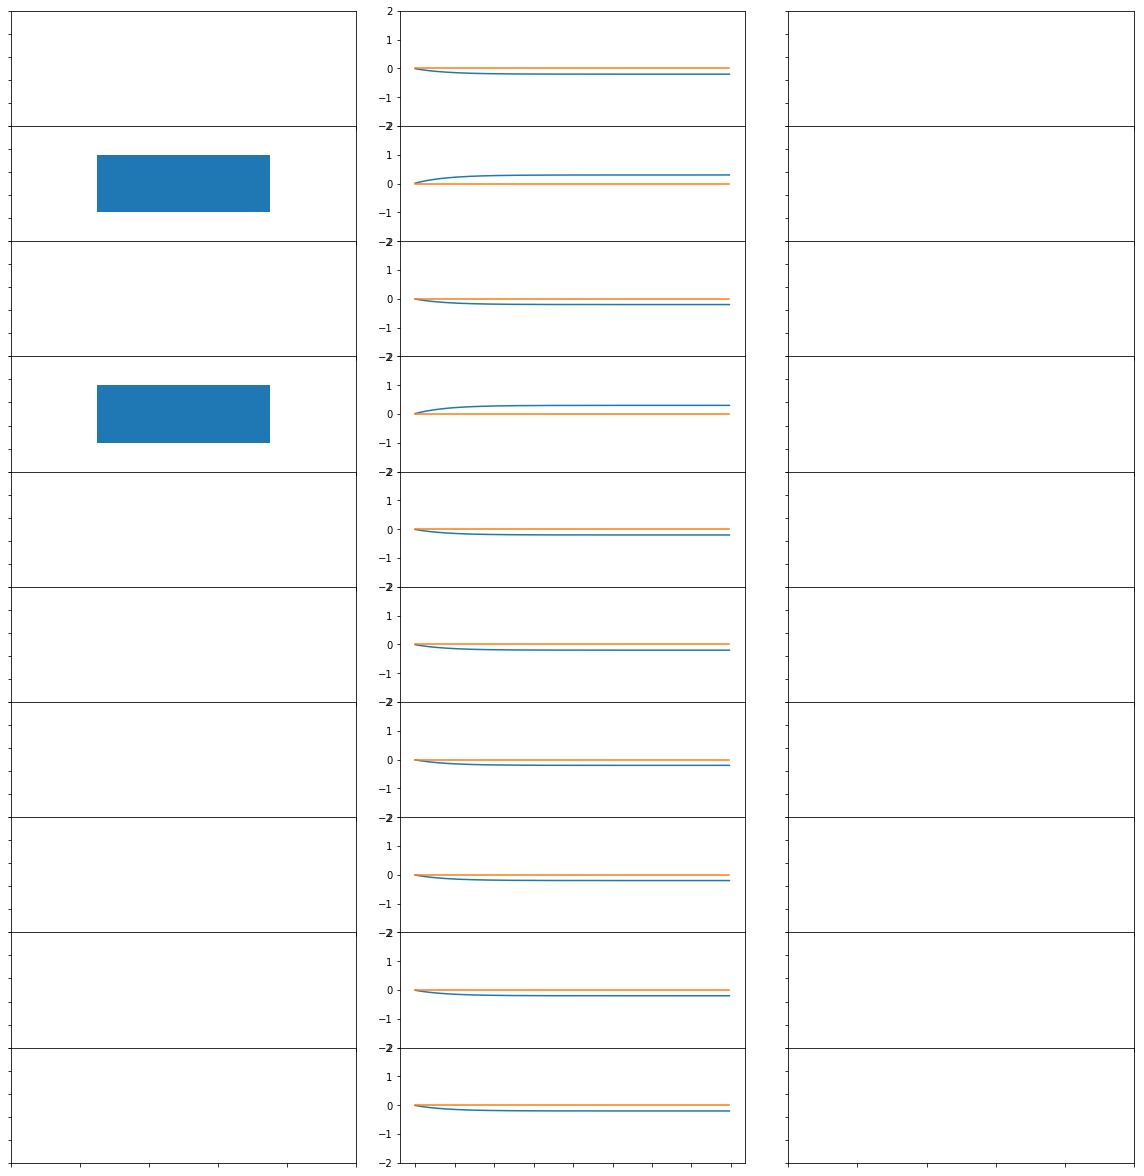

In [7]:
# La cuarta entrada tiene el valor máximo
stimulus = np.array([[0.0, 0.5, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0,0.0]]).T

MaxSelector(time, delta, stimulus, tau_u, w1_u, w2_u, h1_u, k_u, tau_v, h2_v )

### 3) Ver qué ocurre con dos estímulos iguales

array([[0., 1., 0., 1., 0., 0., 0., 0., 0., 0.]])

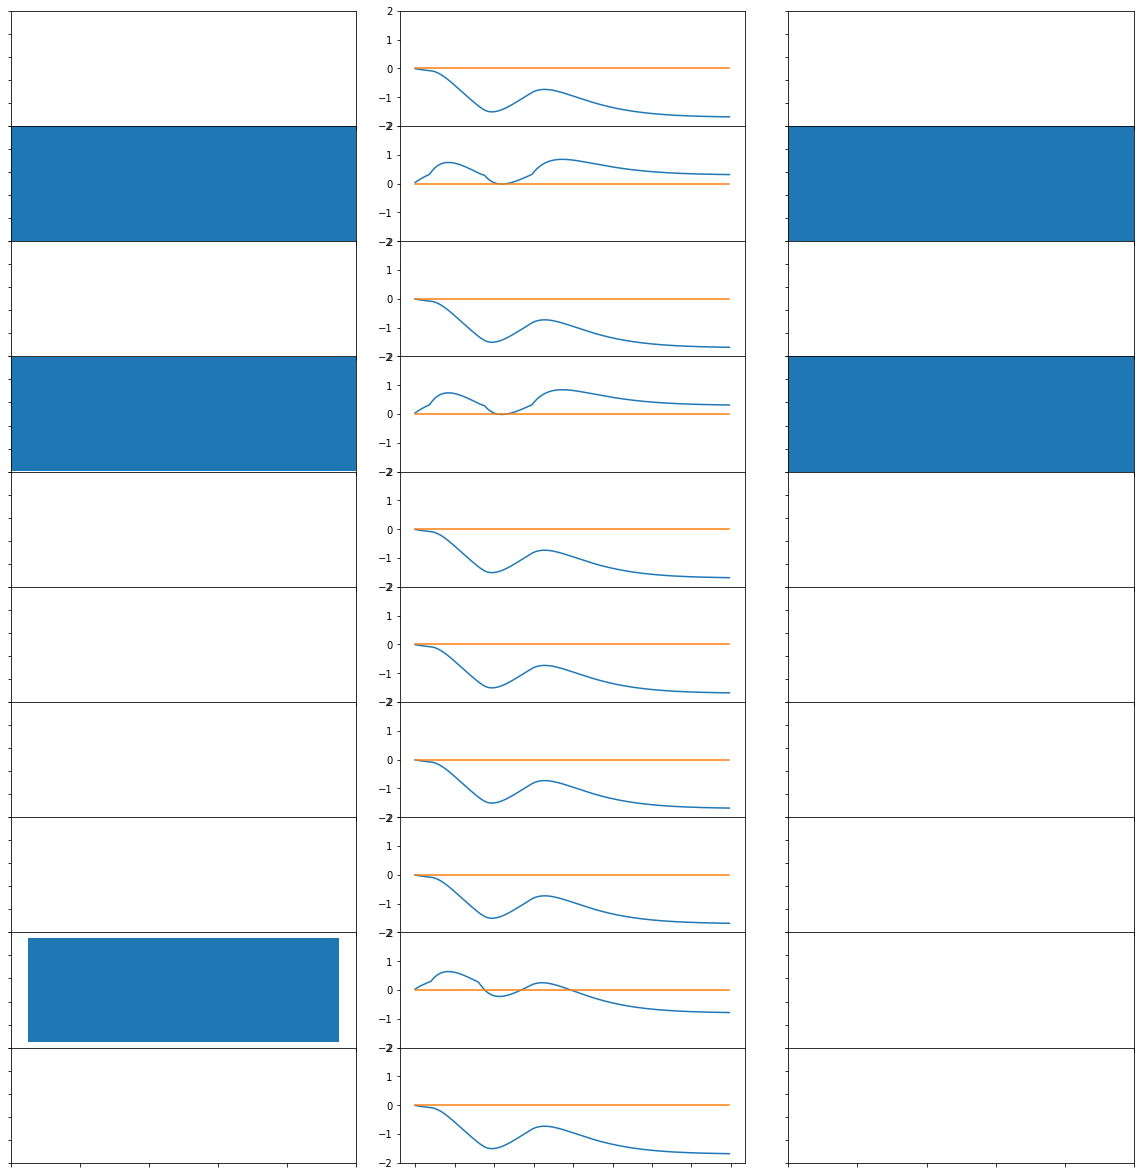

In [8]:
# La segunda y la cuarta entrada tienen el valor máximo
stimulus = np.array([[0.0, 0.998, 0.0, 0.998, 0.0, 0.0, 0.0, 0.0, 0.9, 0.0]]).T

MaxSelector(time, delta, stimulus, tau_u, w1_u, w2_u, h1_u, k_u, tau_v, h2_v )

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

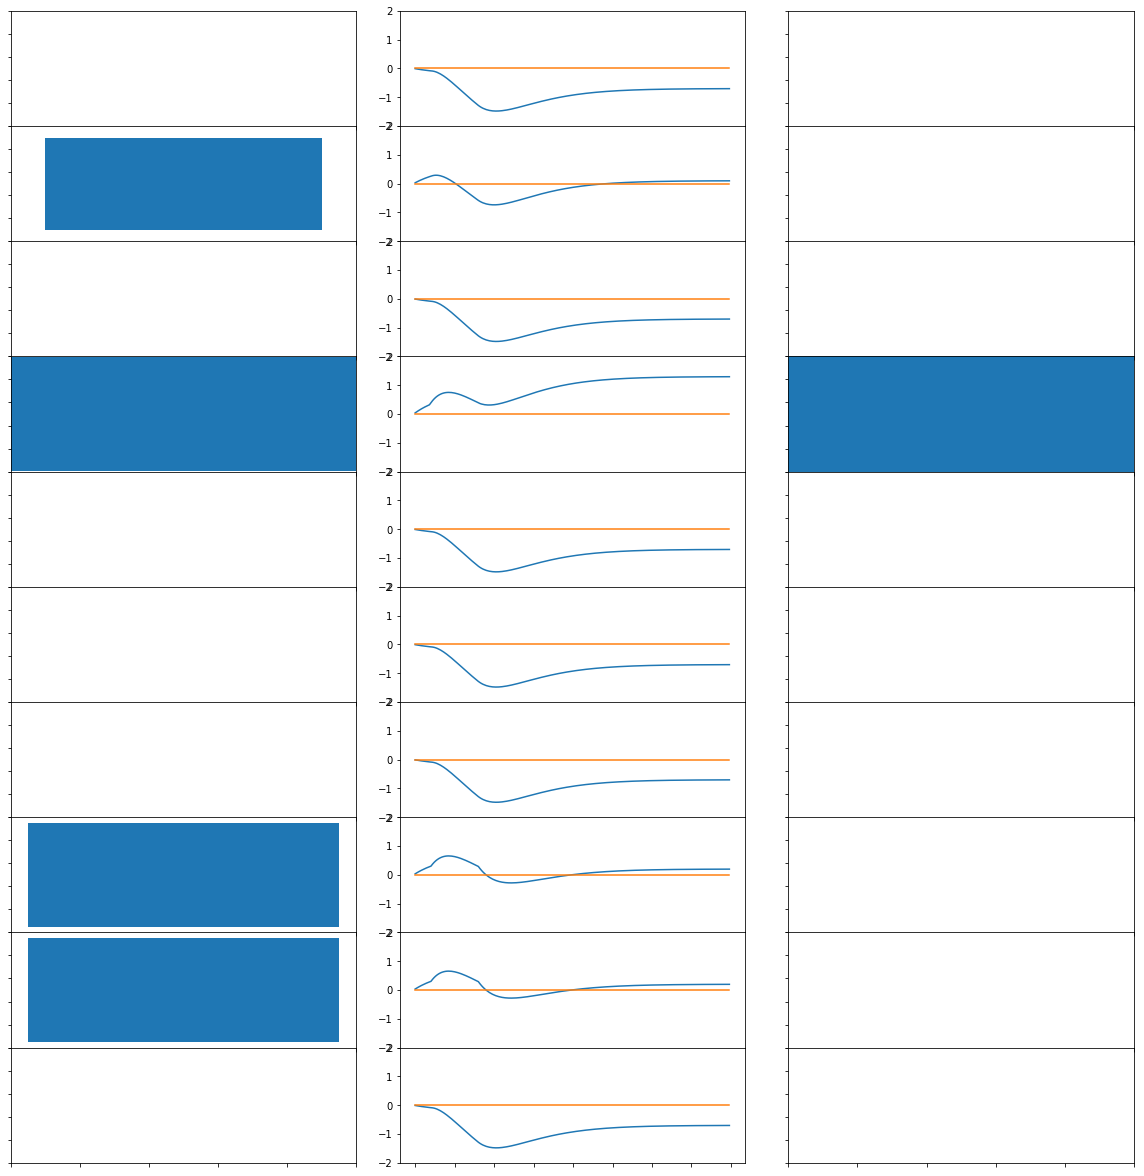

In [9]:
# Las entradas 8 y 9 tienen el mismo valor, la cuarta entrada es la de valor máximo
stimulus = np.array([[0.0, 0.8, 0.0, 0.998, 0.0, 0.0, 0.0, 0.9, 0.9, 0.0]]).T

MaxSelector(time, delta, stimulus, tau_u, w1_u, w2_u, h1_u, k_u, tau_v, h2_v )

Cuando se tienen dos estímulos iguales que tienen el mayor valor se eligen ambas (las dos tienen valo uno en el vector de salida (uf)). Si las entradas iguales no son el máximo, se elige el máximo. Las entradas del vector up (que ya no imprimo) deben coincidir en entradas iguales.

### 4. Modificar los parámetros para que el modelo no seleccione ganador cuando hay dos estímulos iguales

In [10]:
# Se agrega una nueva variable que elige al ganador si sólo hay un ganador

def MaxSelector2(time, delta, stimulus, tau_u, w1_u, w2_u, h1_u, k_u, tau_v, h2_v):
    size  = np.size(stimulus)
    up    = np.zeros((size,1))
    uf    = np.zeros((size,1))
    sel   = np.zeros((size,1))
    matup = np.zeros((size,round(1/delta*time)))
    vp    = 0.0
    vf    = 0.0
    count = 0
    for t in np.arange(0.0, time, delta):
        up  = diff(up, delta, tau_u, -up +w1_u*uf -w2_u*vf -h1_u +stimulus)
        uf  = step(up, k_u, 0.0, 1.0)
        
        matup[:,count] = up.T
        count          = count + 1
        
        if (np.sum(uf) == 1 ):
            sel= uf
        else:
            sel = np.zeros((size,1))
    
        vp = diff(vp, delta, tau_v, -vp + np.sum(uf) -h2_v)
        vf = ramp(vp, 0.0)
    plot_est_mem_out(size, stimulus, matup ,sel)

    return(sel.T)

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

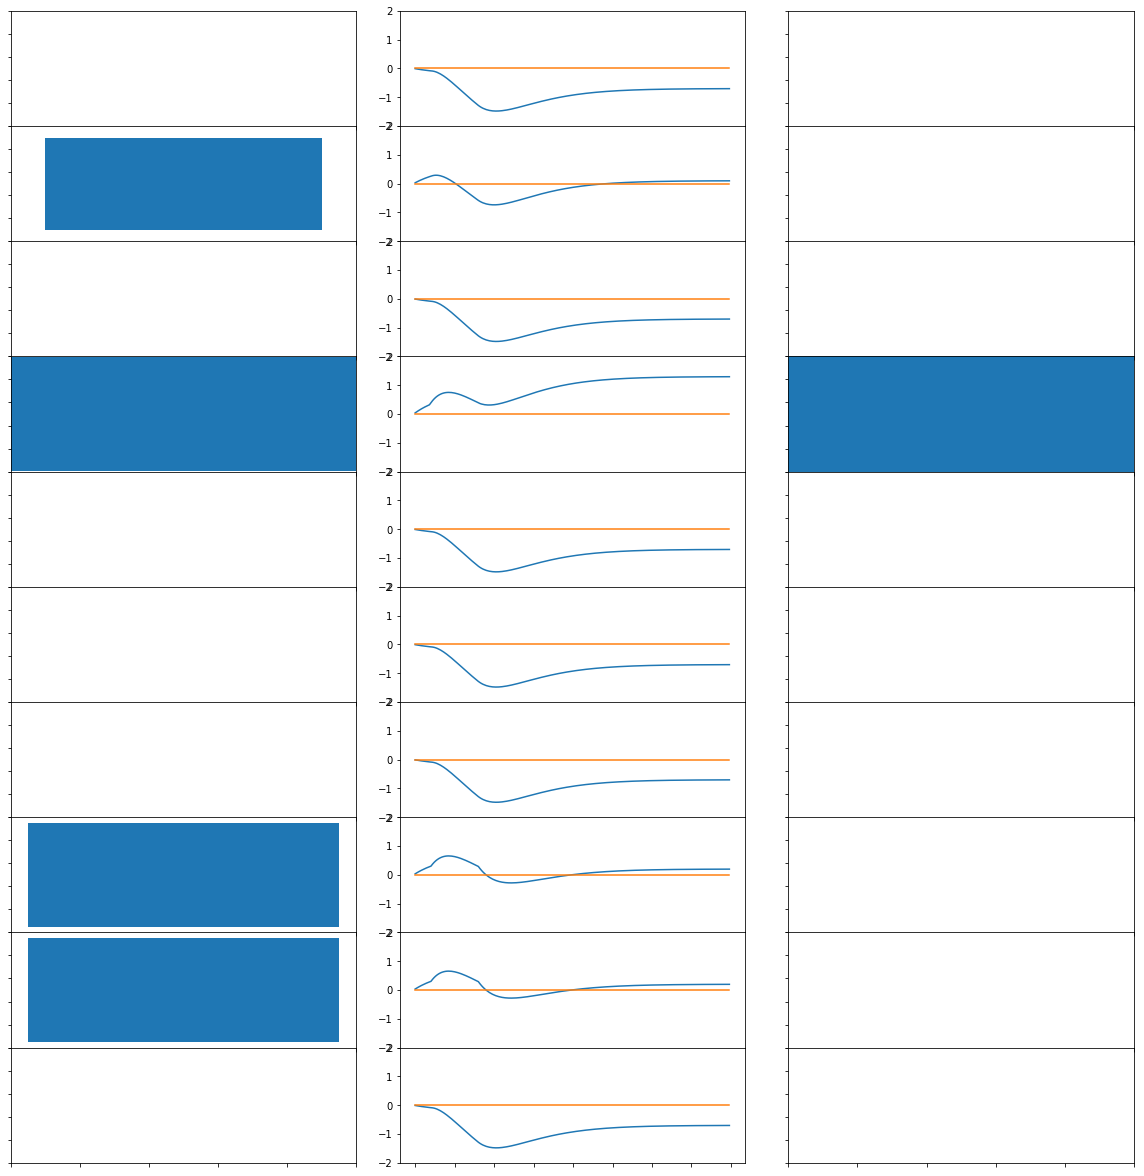

In [11]:
# Las entradas 8 y 9 tienen el mismo valor, la cuarta entrada es la de valor máximo
stimulus = np.array([[0.0, 0.8, 0.0, 0.998, 0.0, 0.0, 0.0, 0.9, 0.9, 0.0]]).T

MaxSelector2(time, delta, stimulus, tau_u, w1_u, w2_u, h1_u, k_u, tau_v, h2_v )

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

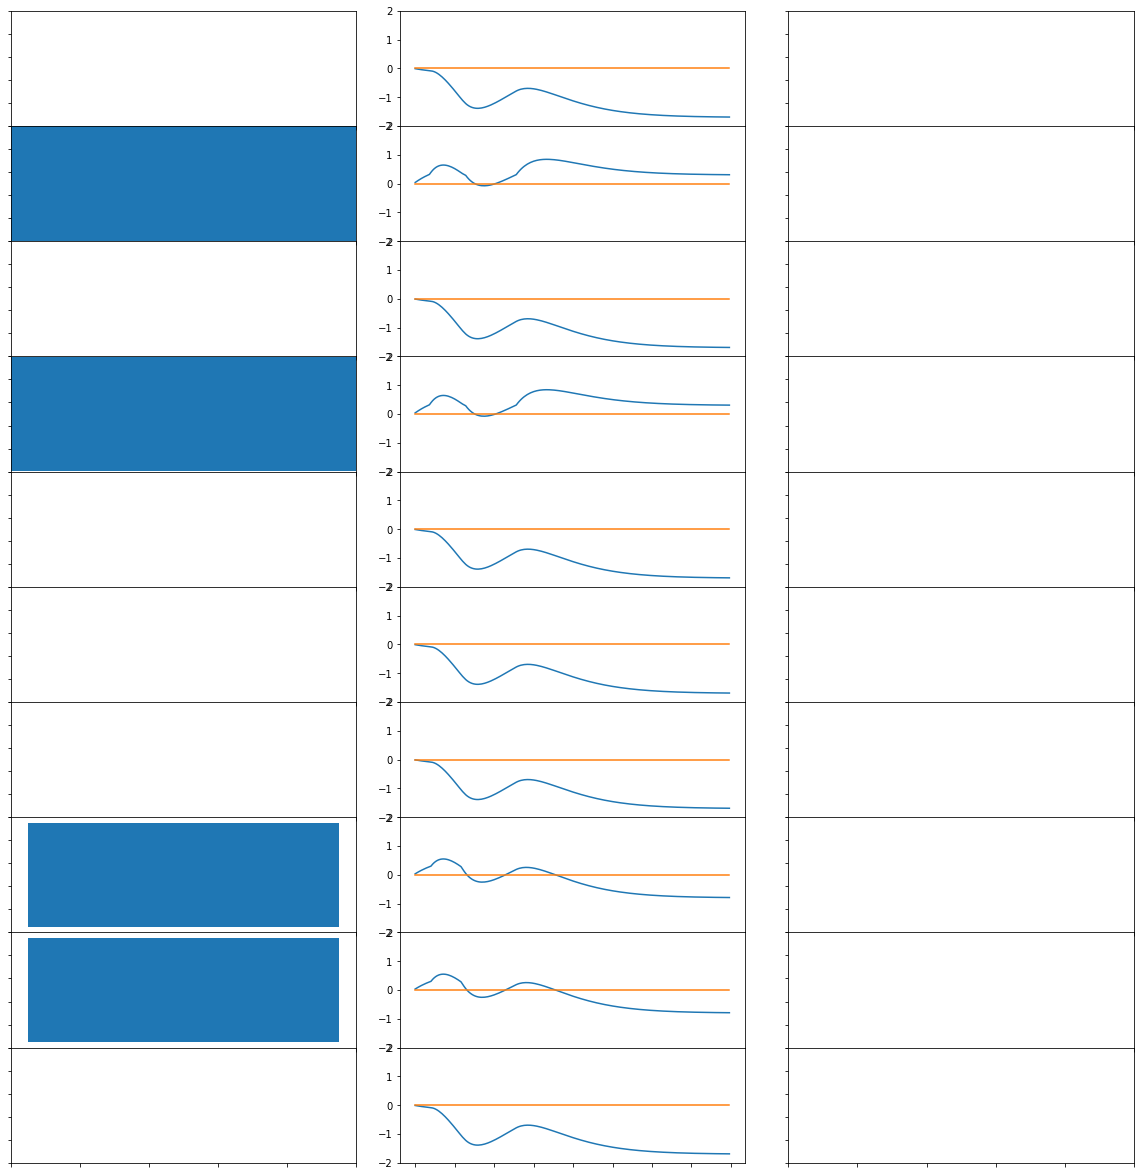

In [12]:
# Las entradas 8 y 9 tienen el mismo valor, la cuarta entrada es la de valor máximo
stimulus = np.array([[0.0, 0.998, 0.0, 0.998, 0.0, 0.0, 0.0, 0.9, 0.9, 0.0]]).T

MaxSelector2(time, delta, stimulus, tau_u, w1_u, w2_u, h1_u, k_u, tau_v, h2_v )

### 5) Explicar y reproducir el fenómeno de histéresis 

Histéresis se refiere a que un sistema tiende a manter sus propiedades, en este caso particular sería que una vez elegido el máximo éste se mantiene

In [13]:
def plot_est_mem_out_H(n, vals1, vals2, matvals, vals3):
    fig = plt.figure()
    m   = np.shape(matvals)[1]
    for i in range(0,n):
        axi1 = fig.add_axes([0.0, 0.4*(n-i), 0.8, 0.4],
                   xticklabels=[], ylim=(0.0, 1.0), yticklabels=[])
        axi2 = fig.add_axes([0.9, 0.4*(n-i), 0.8, 0.4],
                   xticklabels=[], ylim=(0.0, 1.0), yticklabels=[])
        
        axj = fig.add_axes([1.8, 0.4*(n-i), 0.8, 0.4],
                   xticklabels=[], ylim=(-2.0, 2.0))
        
        axk = fig.add_axes([2.7, 0.4*(n-i), 0.8, 0.4],
                   xticklabels=[], ylim=(0.0, 1.0), yticklabels=[])
        
        axi1.add_patch(
        patches.Rectangle((0.5-vals1[i]/2, 0.5-vals1[i]/2), vals1[i], vals1[i]))
        
        axi2.add_patch(
        patches.Rectangle((0.5-(vals1[i]+vals2[i])/2, 0.5-(vals1[i]+vals2[i])/2),
                          (vals1[i]+vals2[i]), (vals1[i]+vals2[i])))
        
        axj.plot(matvals[i,])
        axj.plot(np.zeros(m))
        
        axk.add_patch(
        patches.Rectangle((0,0), vals3[i], vals3[i]))

In [14]:

def MaxSelectorH(time, delta, stimulus, stimulus2, lag, tau_u, w1_u, w2_u, h1_u, k_u, tau_v, h2_v):
    size  = np.size(stimulus)
    up    = np.zeros((size,1))
    uf    = np.zeros((size,1))
    sel   = np.zeros((size,1))
    matup = np.zeros((size,round(1/delta*time)))
    vp    = 0.0
    vf    = 0.0
    count = 0

    for t in np.arange(0.0, time, delta):
        if(t<lag):
            up  = diff(up, delta, tau_u, -up +w1_u*uf -w2_u*vf -h1_u +stimulus)
            uf  = step(up, k_u, 0.0, 1.0)
            matup[:,count] = up.T
            count          = count + 1
        
        else:
            up  = diff(up, delta, tau_u, -up +w1_u*uf -w2_u*vf -h1_u +stimulus+stimulus2)
            uf  = step(up, k_u, 0.0, 1.0)
            matup[:,count] = up.T
            count          = count + 1
        
            
        if (np.sum(uf) == 1 ):
            sel= uf
        else:
            sel = np.zeros((size,1))
    
        vp = diff(vp, delta, tau_v, -vp + np.sum(uf) -h2_v)
        vf = ramp(vp, 0.0)
        
    plot_est_mem_out_H(size, stimulus,stimulus2, matup ,uf)


    return(sel.T)



array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

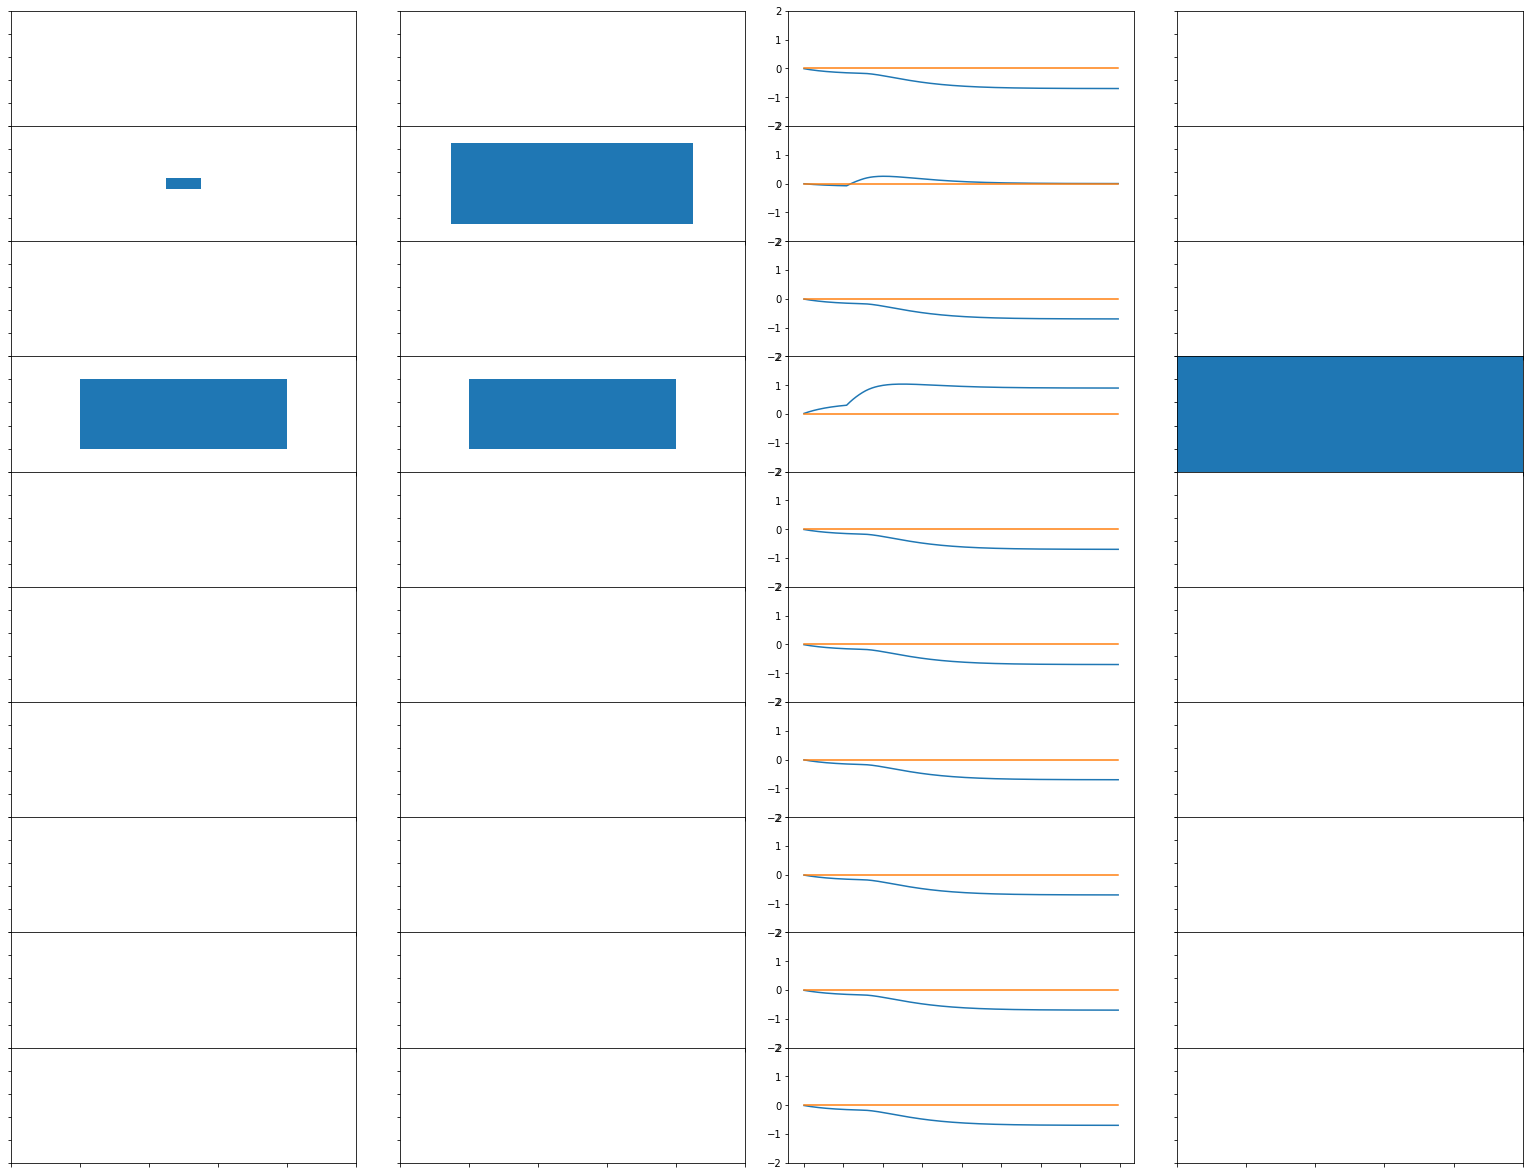

In [15]:
# Las entradas 8 y 9 tienen el mismo valor, la cuarta entrada es la de valor máximo
stimulus  = np.array([[0.0, 0.1, 0.0, 0.6, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]).T
stimulus2 = np.array([[0.0, 0.6, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]).T
lag       = 1.4
MaxSelectorH(time, delta, stimulus, stimulus2, lag, tau_u, w1_u, w2_u, h1_u, k_u, tau_v, h2_v )

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

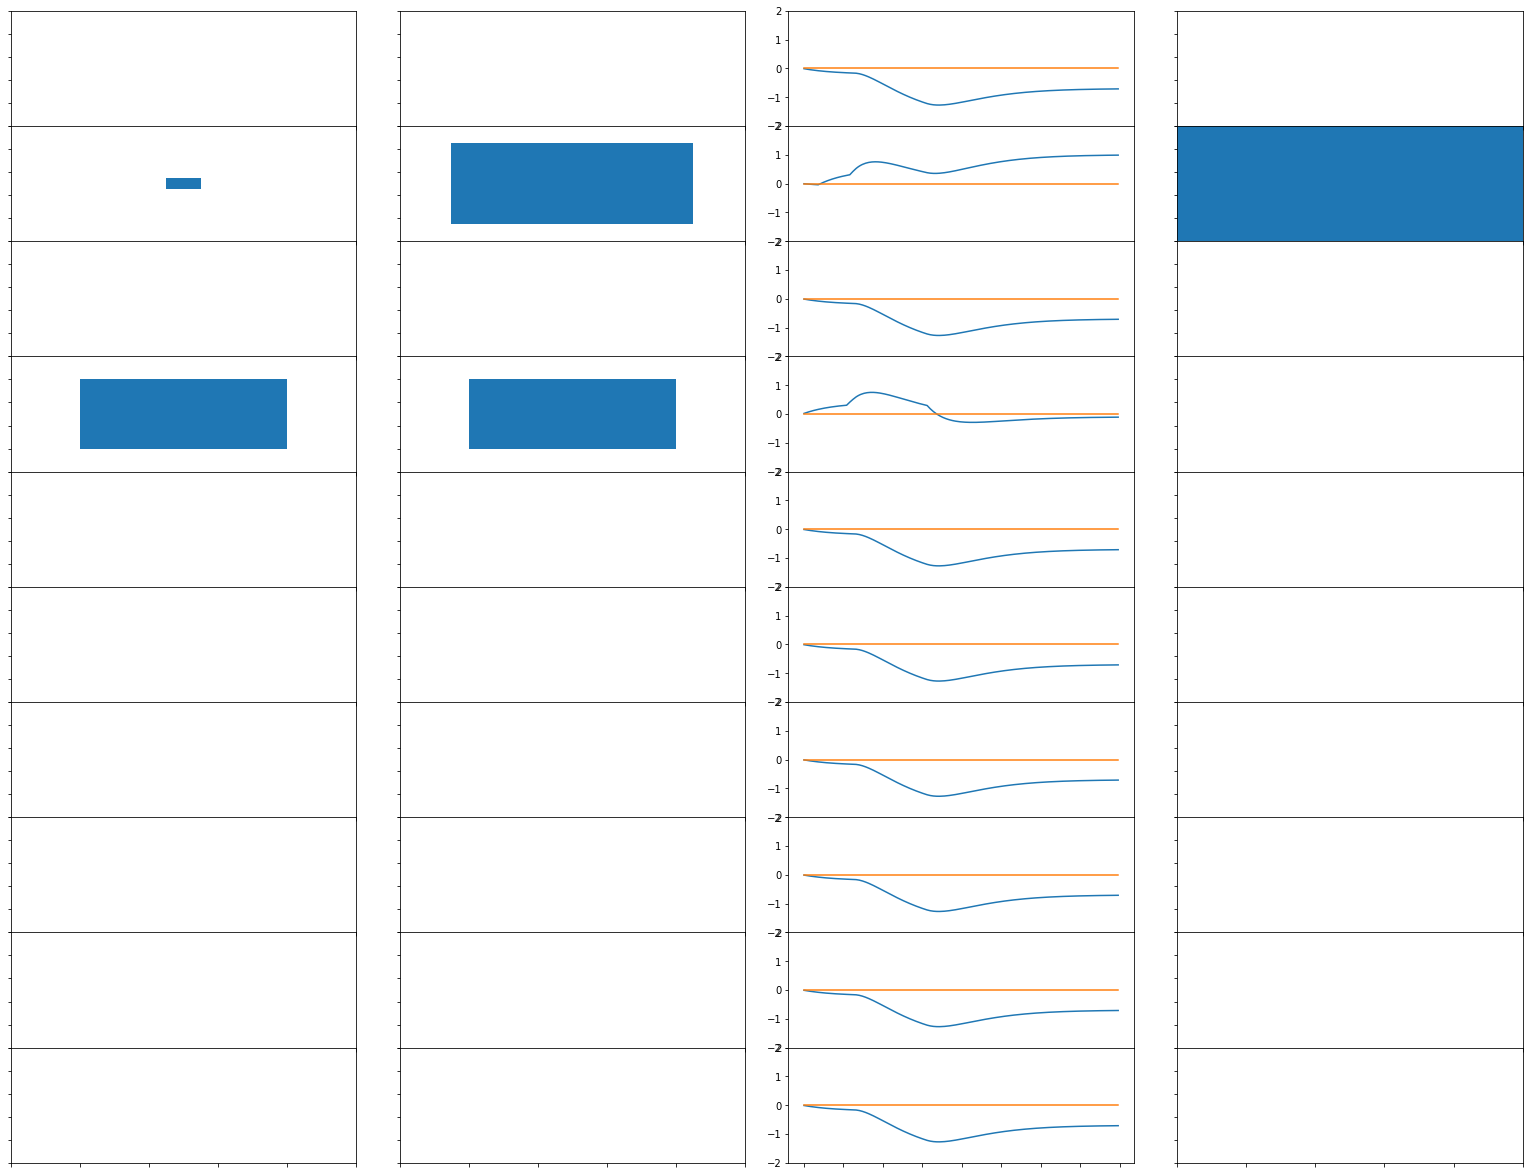

In [16]:
# Las entradas 8 y 9 tienen el mismo valor, la cuarta entrada es la de valor máximo
stimulus  = np.array([[0.0, 0.1, 0.0, 0.6, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]).T
stimulus2 = np.array([[0.0, 0.6, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]).T
lag       = 0.5
MaxSelectorH(time, delta, stimulus, stimulus2, lag, tau_u, w1_u, w2_u, h1_u, k_u, tau_v, h2_v )

### 6. Crear un esquema motor que, 
1. Codifique el estímulo o estímulos seleccionados cómo una dirección (i.e. para el iésimo estimulo traducirlo a i-(n-1)/2, así, si el primer estímulo de 10 totales es el seleccionado, la dirección sería 0-(10-1)/2 = -4.5 y el último estímulo sería 9-(10-1)/2 = 4.5). 
2. Si hay más de un estímulo seleccionado se toma el promedio.
3. Este valor lo representaría el potencial de membrana de la neurona de este esquema

In [17]:
def plot_motor(direc):
    fig = plt.figure()
    ax1 = fig.add_axes([0.0, 0.0, 0.8, 0.8], xlim=(-5.0, 5.0))
    ax1.add_patch(
    patches.Rectangle((direc-0.5, 0.0),1.0,1.0))

        
def Motor(resultMS):
    n     = np.size(resultMS)
    aux   = np.arange(-(n-1)/2,(n)/2,1)
    direc = np.sum((resultMS*aux/np.sum(resultMS)))
    plot_motor(direc)
    return(direc)


def MotorMax(time, delta, stimulus, tau_u, w1_u, w2_u, h1_u, k_u, tau_v, h2_v):
    res = MaxSelector(time, delta, stimulus, tau_u, w1_u, w2_u, h1_u, k_u, tau_v, h2_v )
    print(res)
    return(Motor(res))

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


-3.5

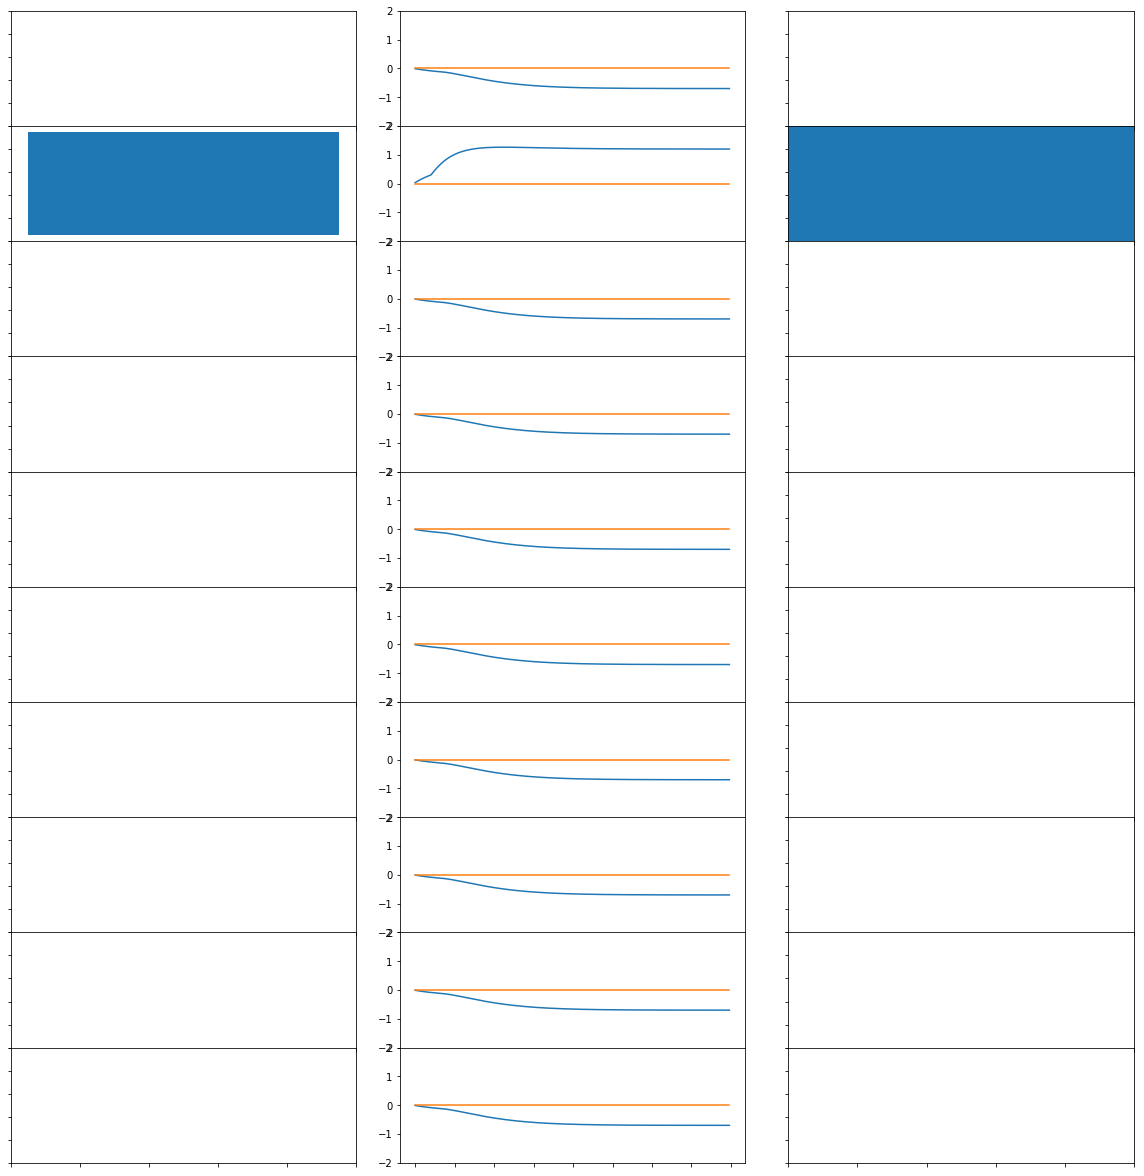

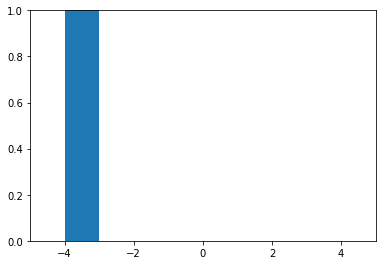

In [18]:
# Las entradas 8 y 9 tienen el mismo valor, la cuarta entrada es la de valor máximo
stimulus = np.array([[0.0, 0.9, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]).T
MotorMax(time, delta, stimulus, tau_u, w1_u, w2_u, h1_u, k_u, tau_v, h2_v )

### 7) ¿Qué ocurre con el esquema motor cuando hay 2 estímulos ganadores? Si el esquema motor codifica la dirección del lengüetazo, hacia donde se daría este.

[[0. 1. 0. 0. 0. 0. 0. 0. 1. 0.]]


0.0

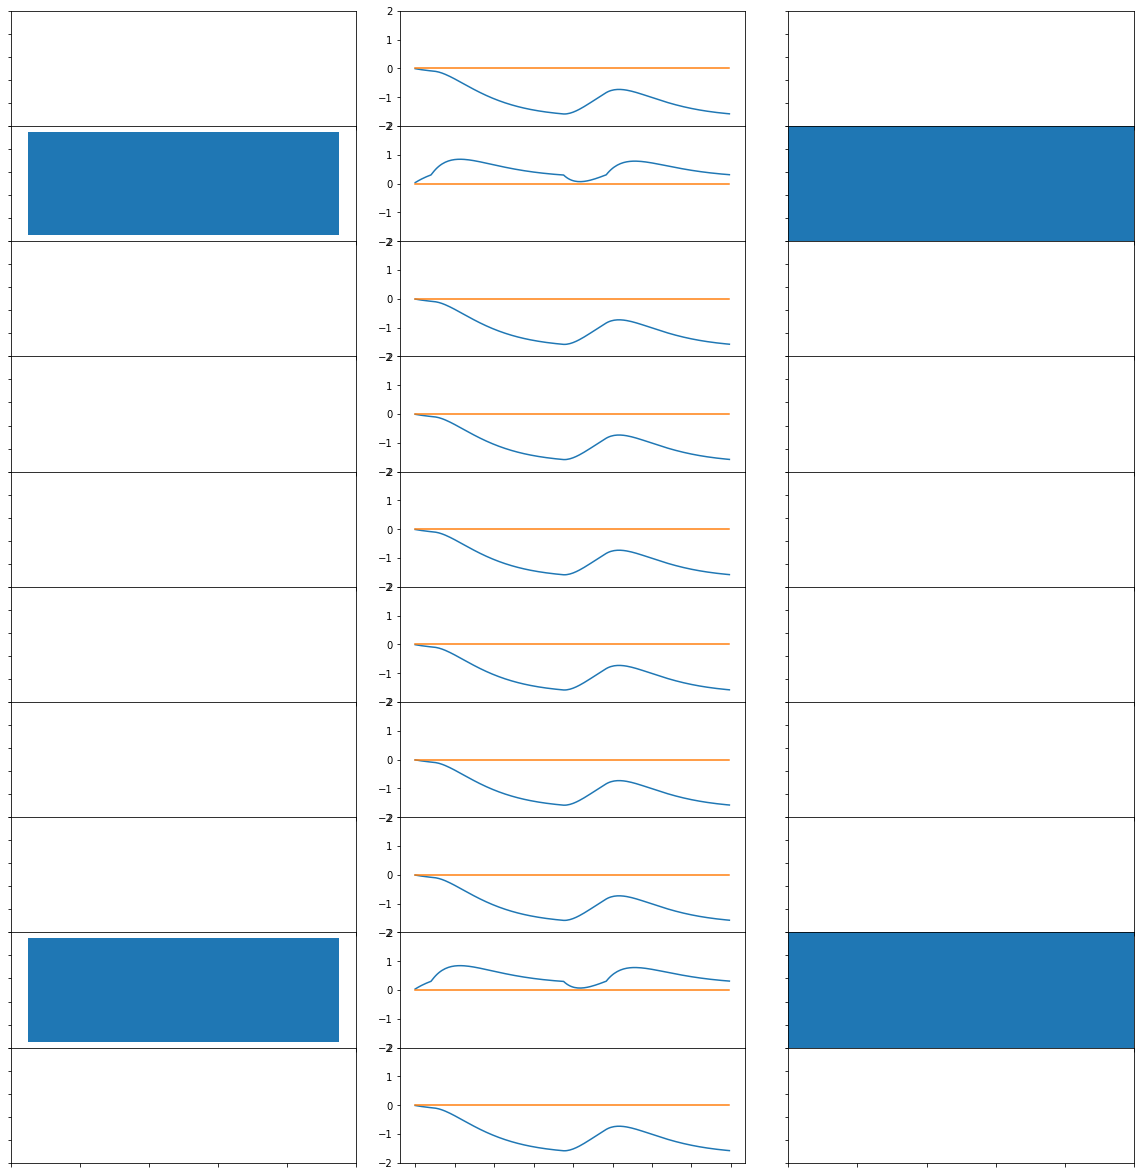

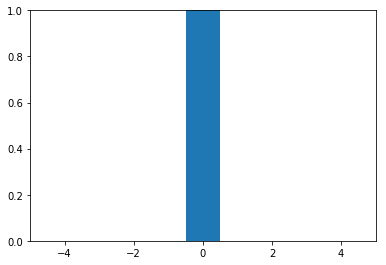

In [19]:
# Las entradas 2 y 9 tienen el mismo valor, la cuarta entrada es la de valor máximo
stimulus = np.array([[0.0, 0.9, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9, 0.0]]).T
MotorMax(time, delta, stimulus, tau_u, w1_u, w2_u, h1_u, k_u, tau_v, h2_v )

[[0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]]


-3.0

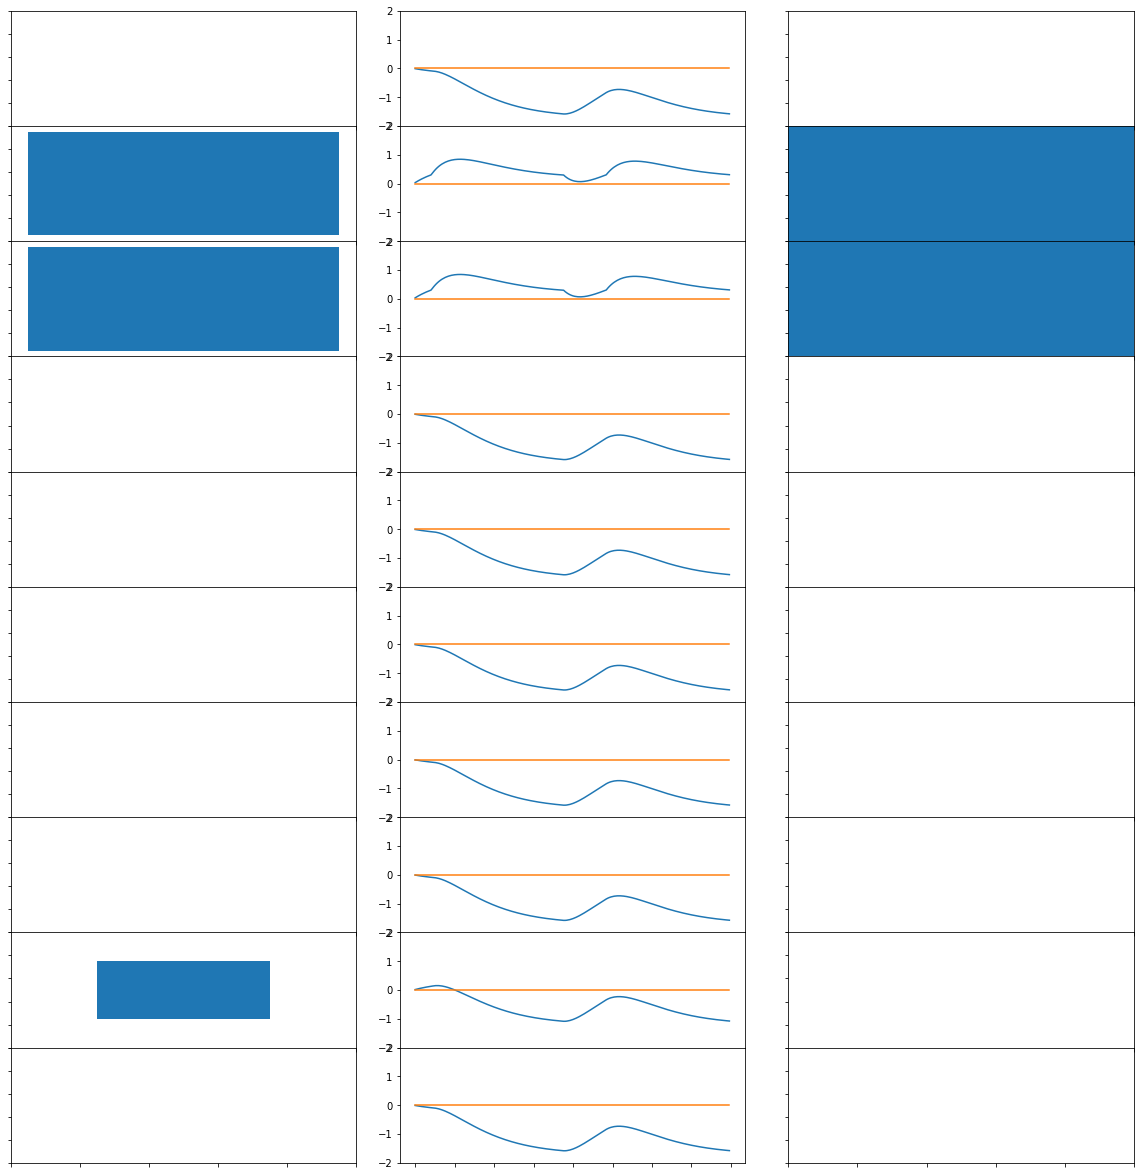

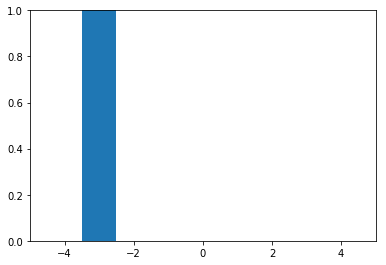

In [20]:
# Las entradas 2 y 3 tienen el mismo valor, la cuarta entrada es la de valor máximo
stimulus = np.array([[0.0, 0.9, 0.9, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0]]).T
MotorMax(time, delta, stimulus, tau_u, w1_u, w2_u, h1_u, k_u, tau_v, h2_v )

Cuando el máximo se repite, el esquema motor toma el promedio entre los dos impulsos motores.